In [1]:
#THIS CODE ONLY DO THE WHOLE DATA TRAINING, NO CROSS_VALIDATION AND FEATURE SELECTION
import pandas as pd
import numpy as np
import newSom
import experiment
import dataset_read
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

C:\Users\fooli\anaconda3\envs\gpu_env\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataread = dataset_read.DATAREAD()

In [3]:
csv = pd.read_csv("Toddler Autism dataset July 2018.csv")
csv = csv.sample(int(csv.shape[0]*0.1))
csv_original_encode = csv


# class label do not need to onehot encoding, label ercoding will be OK
dataread.label_encoding(csv_original_encode,"Class/ASD Traits ")

#dataread.effect_encoding(csv_original_encode,["Sex","Ethnicity","Jaundice","Family_mem_with_ASD","Who completed the test"])


dataread.label_encoding(csv,"Sex")
dataread.label_encoding(csv,"Ethnicity")
dataread.label_encoding(csv,"Jaundice")
dataread.label_encoding(csv,"Family_mem_with_ASD")
dataread.label_encoding(csv,"Who completed the test")
dataread.label_encoding(csv,"Class/ASD Traits ")

# label encoding
dataread.original_encoding_data = csv
#*** -1 the class labe is not included 
dataread.original_encoded_feature_num = csv.shape[1]-1


csv_test = csv.sample(int(csv.shape[0]*0.3))
csv_training = csv.drop(csv_test.index,axis = 0)


csv_test_original_encoded = dataread.original_encoding_data.sample(int(dataread.original_encoding_data.shape[0]*0.3))
csv_training_original_encoded = dataread.original_encoding_data.drop(csv_test_original_encoded.index,axis = 0)

dataread.initializedataset(csv,csv_training,csv_test,csv_training_original_encoded,csv_test_original_encoded,"Class/ASD Traits ")



11111111
self.continuous_feature_num 2
self.data_discrete_indexes ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test'] 


neuron unit number: 2
self.train_new_embedding_sog_fuzzy.shape[1] 32
test_discrete_score_W0_p 0.7419354838709677
test_discrete_score_W0_n 0.3459246153838826
test_discrete_score_W0_a 0.21137042362570513
test_discrete_score_W_discrete_p 0.8064516129032258
test_discrete_score_W_discrete_n 0.4274519288296353
test_discrete_score_W_discrete_a 0.35791217895608946
neuron unit number: 7
self.train_new_embedding_sog_fuzzy.shape[1] 112
test_discrete_score_W0_p 0.9354838709677419
test_discrete_score_W0_n 0.6931458666028534
test_discrete_score_W0_a 0.7485314685314686
test_discrete_score_W_discrete_p 0.9032258064516129
test_discrete_score_W_discrete_n 0.4874673349085909
test_discrete_score_W_discrete_a 0.6271691197525915
Not good purity result for discrete features !!!!!
Not good nmi result for discrete features !!!!!
Not good ari result for discrete features  !!!!!
neuron unit number: 12
self.train_new_embedding_sog_fuzzy.shape[1] 192
test_discrete_score_W0_p 0.9354838709677419
test_discrete_score_

self.train_new_embedding_sog_fuzzy.shape[1] 1472
test_discrete_score_W0_p 0.9354838709677419
test_discrete_score_W0_n 0.6140722089532765
test_discrete_score_W0_a 0.7449211213256157
test_discrete_score_W_discrete_p 0.9032258064516129
test_discrete_score_W_discrete_n 0.6059857241600244
test_discrete_score_W_discrete_a 0.6376690599432292
Not good purity result for discrete features !!!!!
Not good nmi result for discrete features !!!!!
Not good ari result for discrete features  !!!!!
neuron unit number: 97
self.train_new_embedding_sog_fuzzy.shape[1] 1552
test_discrete_score_W0_p 0.9032258064516129
test_discrete_score_W0_n 0.6059857241600244
test_discrete_score_W0_a 0.6376690599432292
test_discrete_score_W_discrete_p 0.9032258064516129
test_discrete_score_W_discrete_n 0.4874673349085909
test_discrete_score_W_discrete_a 0.6271691197525915
Not good nmi result for discrete features !!!!!
Not good ari result for discrete features  !!!!!
test_discrete_score_W0_p mean 0.9064516129032256
test_disc

C:\Users\fooli\anaconda3\envs\gpu_env\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fooli\anaconda3\envs\gpu_env\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


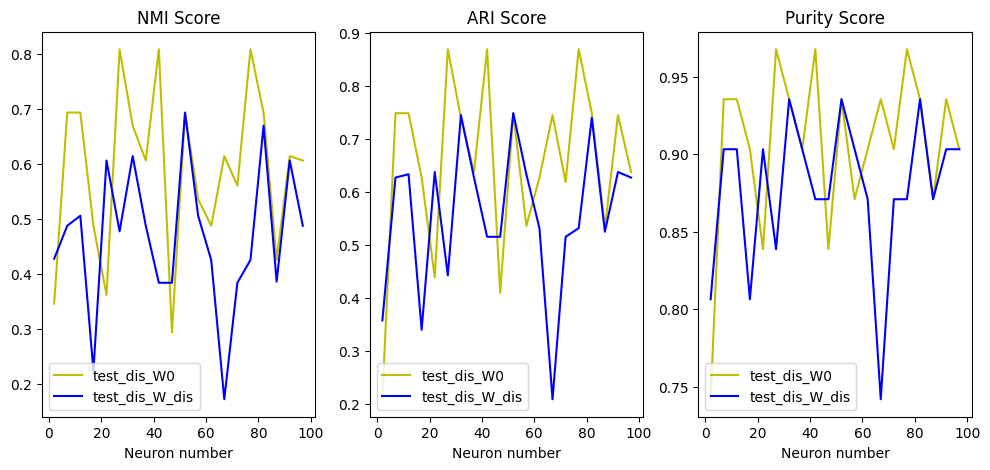

NMI T-Test
         Variable     N      Mean        SD        SE  95% Conf.  Interval
0     test_dis_W0  20.0  0.590240  0.153003  0.034212   0.518633  0.661848
1  test_dis_W_dis  20.0  0.467578  0.132775  0.029689   0.405438  0.529719
2        combined  40.0  0.528909  0.154439  0.024419   0.479517  0.578301
                             Independent t-test  results
0  Difference (test_dis_W0 - test_dis_W_dis) =    0.1227
1                         Degrees of freedom =   38.0000
2                                          t =    2.7079
3                      Two side test p value =    0.0101
4                     Difference < 0 p value =    0.9950
5                     Difference > 0 p value =    0.0050
6                                  Cohen's d =    0.8563
7                                  Hedge's g =    0.8393
8                             Glass's delta1 =    0.8017
9                           Point-Biserial r =    0.4022
ARI T-Test
         Variable     N      Mean        SD        

In [5]:
# ## fuzzy vs baseN encoding AffinityPropagation
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5

features =[0,8]


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,1,3,features)

neuron unit number: 2
self.train_new_embedding_sog_fuzzy.shape[1] 32
test_discrete_score_W0_p 0.7741935483870968
test_discrete_score_W0_n 0.26546809090633566
test_discrete_score_W0_a 0.27994690852781773
self.som_sog_features.weights0(2, 34)
self.test_new_embedding_sog_fuzzy_features [[0.714 0.564 0.543 ... 0.949 1.343 1.257]
 [0.714 0.564 0.457 ... 0.949 1.485 1.641]
 [0.286 0.436 0.543 ... 0.949 1.343 1.257]
 ...
 [0.714 0.564 0.457 ... 0.949 1.485 1.641]
 [0.286 0.436 0.543 ... 0.949 1.343 1.257]
 [0.714 0.564 0.543 ... 0.949 1.343 1.257]]
test_discrete_score_W_discrete_p 0.8387096774193549
test_discrete_score_W_discrete_n 0.3966140094149127
test_discrete_score_W_discrete_a 0.44054714396771927
neuron unit number: 7
self.train_new_embedding_sog_fuzzy.shape[1] 112
test_discrete_score_W0_p 0.7419354838709677
test_discrete_score_W0_n 0.31008596952377177
test_discrete_score_W0_a 0.21518987341772153
self.som_sog_features.weights0(7, 119)
self.test_new_embedding_sog_fuzzy_features [[0.643 0

self.train_new_embedding_sog_fuzzy.shape[1] 992
test_discrete_score_W0_p 0.8064516129032258
test_discrete_score_W0_n 0.2929647726800465
test_discrete_score_W0_a 0.35513396571808953
self.som_sog_features.weights0(62, 1054)
self.test_new_embedding_sog_fuzzy_features [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
test_discrete_score_W_discrete_p 0.9032258064516129
test_discrete_score_W_discrete_n 0.6288106631235478
test_discrete_score_W_discrete_a 0.6385073853329878
neuron unit number: 67
self.train_new_embedding_sog_fuzzy.shape[1] 1072
test_discrete_score_W0_p 0.8709677419354839
test_discrete_score_W0_n 0.4424556750042795
test_discrete_score_W0_a 0.5352237811424129
self.som_sog_features.weights0(67, 1139)
self.test_new_embedding_sog_fuzzy_features [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 

C:\Users\fooli\anaconda3\envs\gpu_env\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fooli\anaconda3\envs\gpu_env\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


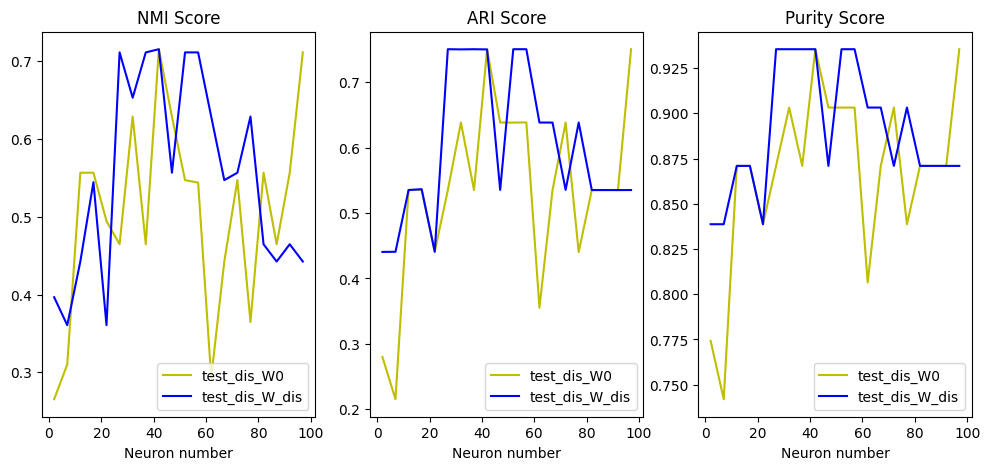

NMI T-Test
         Variable     N      Mean        SD        SE  95% Conf.  Interval
0     test_dis_W0  20.0  0.505654  0.126093  0.028195   0.446640  0.564667
1  test_dis_W_dis  20.0  0.552534  0.125429  0.028047   0.493831  0.611236
2        combined  40.0  0.529094  0.126388  0.019984   0.488673  0.569514
                             Independent t-test  results
0  Difference (test_dis_W0 - test_dis_W_dis) =   -0.0469
1                         Degrees of freedom =   38.0000
2                                          t =   -1.1788
3                      Two side test p value =    0.2458
4                     Difference < 0 p value =    0.1229
5                     Difference > 0 p value =    0.8771
6                                  Cohen's d =   -0.3728
7                                  Hedge's g =   -0.3654
8                             Glass's delta1 =   -0.3718
9                           Point-Biserial r =   -0.1878
ARI T-Test
         Variable     N      Mean        SD        

In [58]:
# ## fuzzy vs baseN encoding AffinityPropagation
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5

features =[6,15]


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,1,3,features)

neuron unit number: 2
all_train_score_W0_p 0.6856368563685636
all_train_score_W0_n 0.0
all_train_score_W0_a 0.0
test_score_W0_p0.7278481012658228
test_score_W0_n 0.06881138106515927
test_score_W0_a  0.15279828117424177
all_train_score_W_combine_p 0.7479674796747967
all_train_score_W_combine_n 0.11159079827840743
all_train_score_W_combine_a 0.19744383056905776
test_score_W_combine_p 0.8006329113924051
test_score_W_combine_n 0.2046554731499591
test_score_W_combine_a 0.3328258553077697
neuron unit number: 7
all_train_score_W0_p 0.7005420054200542
all_train_score_W0_n 0.03482855707073228
all_train_score_W0_a 0.08232766203149533
test_score_W0_p0.759493670886076
test_score_W0_n 0.1149993348107722
test_score_W0_a  0.2025486263564244
all_train_score_W_combine_p 0.7317073170731707
all_train_score_W_combine_n 0.08481440765994973
all_train_score_W_combine_a 0.16510190551729897
test_score_W_combine_p 0.810126582278481
test_score_W_combine_n 0.22464885574158494
test_score_W_combine_a 0.356370144876

test_score_W_combine_p 0.7848101265822784
test_score_W_combine_n 0.1723554639384632
test_score_W_combine_a 0.2933480548952447
neuron unit number: 82
all_train_score_W0_p 0.7127371273712737
all_train_score_W0_n 0.054182059395791606
all_train_score_W0_a 0.11679496752741624
test_score_W0_p0.7848101265822784
test_score_W0_n 0.1783112253180036
test_score_W0_a  0.29911294148251666
all_train_score_W_combine_p 0.7330623306233063
all_train_score_W_combine_n 0.08561726390383283
all_train_score_W_combine_a 0.15829147992614373
test_score_W_combine_p 0.7943037974683544
test_score_W_combine_n 0.19583666649343834
test_score_W_combine_a 0.32126974430808364
neuron unit number: 87
all_train_score_W0_p 0.7127371273712737
all_train_score_W0_n 0.05474018288878843
all_train_score_W0_a 0.11881718952537941
test_score_W0_p0.7784810126582279
test_score_W0_n 0.15602417139047373
test_score_W0_a  0.2718106722735857
all_train_score_W_combine_p 0.7384823848238482
all_train_score_W_combine_n 0.09497385078032039
all_t

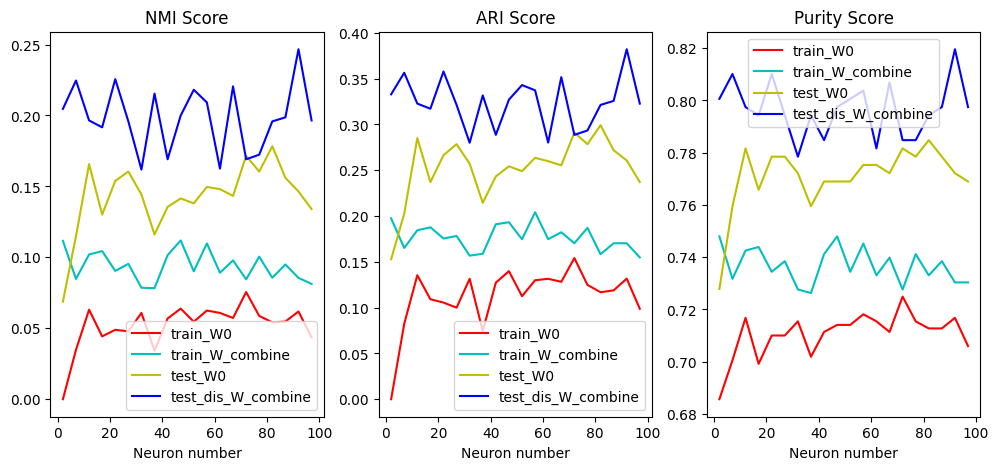

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0         train_W0  20.0  0.051932  0.015840  0.003542   0.044519  0.059346
1  train_W_combine  20.0  0.093919  0.010725  0.002398   0.088899  0.098938
2         combined  40.0  0.072926  0.025106  0.003970   0.064896  0.080955
                           Independent t-test  results
0  Difference (train_W0 - train_W_combine) =   -0.0420
1                       Degrees of freedom =   38.0000
2                                        t =   -9.8155
3                    Two side test p value =    0.0000
4                   Difference < 0 p value =    0.0000
5                   Difference > 0 p value =    1.0000
6                                Cohen's d =   -3.1039
7                                Hedge's g =   -3.0423
8                           Glass's delta1 =   -2.6506
9                         Point-Biserial r =   -0.8468
         Variable     N      Mean        SD        SE  95% Conf.  Interval
0    

In [4]:
#one hot encoding  hybird
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,2,4)

neuron unit number: 2
all_train_score_W0_p 0.6924119241192412
all_train_score_W0_n 0.0
all_train_score_W0_a 0.0
test_score_W0_p0.6993670886075949
test_score_W0_n 0.028126866164033017
test_score_W0_a  0.061350141827041973
all_train_score_W_combine_p 0.7425474254742548
all_train_score_W_combine_n 0.0947652980706082
all_train_score_W_combine_a 0.17411555782142185
test_score_W_combine_p 0.7848101265822784
test_score_W_combine_n 0.18151456275924302
test_score_W_combine_a 0.2888410603626961
neuron unit number: 7
all_train_score_W0_p 0.7005420054200542
all_train_score_W0_n 0.025371409246990988
all_train_score_W0_a 0.06465767318899822
test_score_W0_p0.7278481012658228
test_score_W0_n 0.07564861764194852
test_score_W0_a  0.143271411279176
all_train_score_W_combine_p 0.7520325203252033
all_train_score_W_combine_n 0.1119980194965581
all_train_score_W_combine_a 0.19867706621009848
test_score_W_combine_p 0.7943037974683544
test_score_W_combine_n 0.20721246915719965
test_score_W_combine_a 0.32759521

neuron unit number: 82
all_train_score_W0_p 0.7154471544715447
all_train_score_W0_n 0.04922063030094059
all_train_score_W0_a 0.10690512157182762
test_score_W0_p0.75
test_score_W0_n 0.11839321955274244
test_score_W0_a  0.2161090988066404
all_train_score_W_combine_p 0.7466124661246613
all_train_score_W_combine_n 0.10317462261914588
all_train_score_W_combine_a 0.19345131488393785
test_score_W_combine_p 0.7658227848101266
test_score_W_combine_n 0.15887433737368695
test_score_W_combine_a 0.2646552346973834
neuron unit number: 87
all_train_score_W0_p 0.7235772357723578
all_train_score_W0_n 0.06374529570710052
all_train_score_W0_a 0.13379883166984782
test_score_W0_p0.7468354430379747
test_score_W0_n 0.11704628004529637
test_score_W0_a  0.21472719256652775
all_train_score_W_combine_p 0.7344173441734417
all_train_score_W_combine_n 0.08037125743959053
all_train_score_W_combine_a 0.15212571092665075
test_score_W_combine_p 0.8037974683544303
test_score_W_combine_n 0.2227773396713064
test_score_W_c

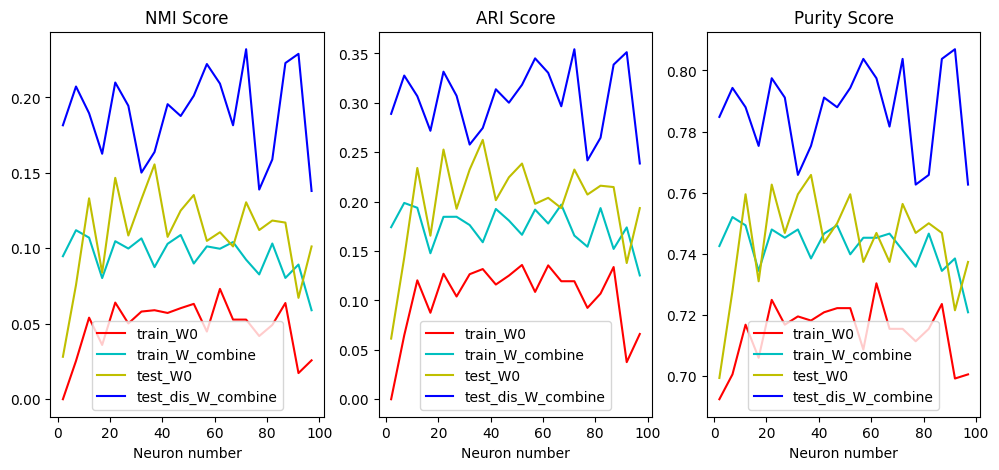

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0         train_W0  20.0  0.047438  0.018283  0.004088   0.038882  0.055995
1  train_W_combine  20.0  0.095324  0.012883  0.002881   0.089295  0.101354
2         combined  40.0  0.071381  0.028839  0.004560   0.062158  0.080604
                           Independent t-test  results
0  Difference (train_W0 - train_W_combine) =   -0.0479
1                       Degrees of freedom =   38.0000
2                                        t =   -9.5750
3                    Two side test p value =    0.0000
4                   Difference < 0 p value =    0.0000
5                   Difference > 0 p value =    1.0000
6                                Cohen's d =   -3.0279
7                                Hedge's g =   -2.9677
8                           Glass's delta1 =   -2.6192
9                         Point-Biserial r =   -0.8408
         Variable     N      Mean        SD        SE  95% Conf.  Interval
0    

In [4]:
#new hash encoding  hybird
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,2,4)

neuron unit number: 2
all_train_score_W0_p 0.7032520325203252
all_train_score_W0_n 0.0070288945601686284
all_train_score_W0_a 0.017758634626636433
test_score_W0_p0.6867088607594937
test_score_W0_n 0.03758364266345287
test_score_W0_a  0.07991477665465842
all_train_score_W_combine_p 0.7601626016260162
all_train_score_W_combine_n 0.11696656889835362
all_train_score_W_combine_a 0.208127437060439
test_score_W_combine_p 0.7689873417721519
test_score_W_combine_n 0.17402279229977538
test_score_W_combine_a 0.2759834983583605
neuron unit number: 7
all_train_score_W0_p 0.7140921409214093
all_train_score_W0_n 0.038281811771113596
all_train_score_W0_a 0.09556990765484258
test_score_W0_p0.7215189873417721
test_score_W0_n 0.09161201834695454
test_score_W0_a  0.1703623059449161
all_train_score_W_combine_p 0.7574525745257452
all_train_score_W_combine_n 0.11171183876347913
all_train_score_W_combine_a 0.20097408420643756
test_score_W_combine_p 0.75
test_score_W_combine_n 0.1360898774893486
test_score_W_c

all_train_score_W_combine_p 0.7506775067750677
all_train_score_W_combine_n 0.09898503040278248
all_train_score_W_combine_a 0.17516078645922573
test_score_W_combine_p 0.7563291139240507
test_score_W_combine_n 0.14708766130314038
test_score_W_combine_a 0.24364609697918754
neuron unit number: 82
all_train_score_W0_p 0.7168021680216802
all_train_score_W0_n 0.03937692975126358
all_train_score_W0_a 0.09242410775260262
test_score_W0_p0.7246835443037974
test_score_W0_n 0.09279832294155865
test_score_W0_a  0.16784068648832987
all_train_score_W_combine_p 0.7371273712737128
all_train_score_W_combine_n 0.07387855674842839
all_train_score_W_combine_a 0.1460305364126594
test_score_W_combine_p 0.7373417721518988
test_score_W_combine_n 0.11742603192110097
test_score_W_combine_a 0.20517697492150777
neuron unit number: 87
all_train_score_W0_p 0.7371273712737128
all_train_score_W0_n 0.07783338563228097
all_train_score_W0_a 0.1621968828160934
test_score_W0_p0.7278481012658228
test_score_W0_n 0.10538690622

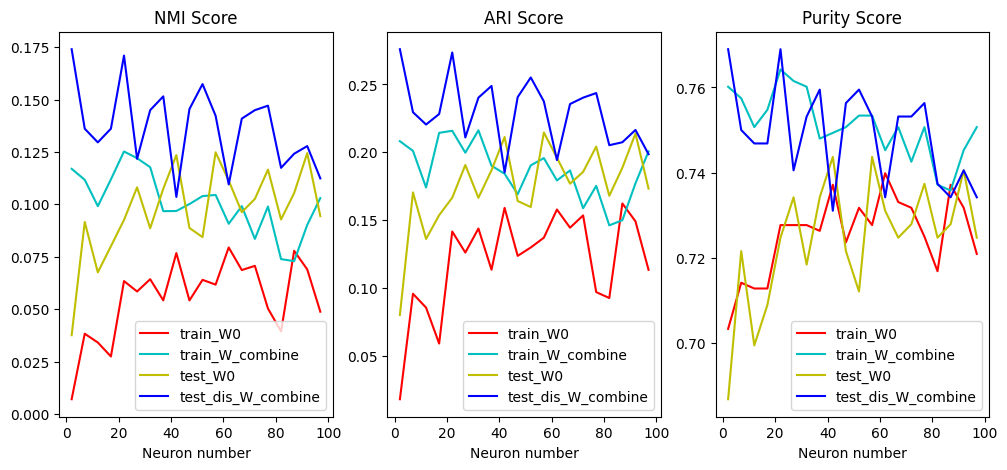

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0         train_W0  20.0  0.055390  0.018631  0.004166   0.046671  0.064110
1  train_W_combine  20.0  0.100964  0.014367  0.003213   0.094240  0.107688
2         combined  40.0  0.078177  0.028324  0.004478   0.069119  0.087235
                           Independent t-test  results
0  Difference (train_W0 - train_W_combine) =   -0.0456
1                       Degrees of freedom =   38.0000
2                                        t =   -8.6627
3                    Two side test p value =    0.0000
4                   Difference < 0 p value =    0.0000
5                   Difference > 0 p value =    1.0000
6                                Cohen's d =   -2.7394
7                                Hedge's g =   -2.6850
8                           Glass's delta1 =   -2.4461
9                         Point-Biserial r =   -0.8148
         Variable     N      Mean        SD        SE  95% Conf.  Interval
0    

In [4]:
#baseN encoding  hybird
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,2,4)

neuron unit number: 2
all_train_score_W0_p 0.6991869918699187
all_train_score_W0_n 0.011858076458447114
all_train_score_W0_a 0.030722860037081922
test_score_W0_p0.6930379746835443
test_score_W0_n 0.033604334993249725
test_score_W0_a  0.07784195656255295
all_train_score_W_combine_p 0.7588075880758808
all_train_score_W_combine_n 0.12277709428534507
all_train_score_W_combine_a 0.22520877782670196
test_score_W_combine_p 0.7879746835443038
test_score_W_combine_n 0.19715504856833063
test_score_W_combine_a 0.3117592227534185
neuron unit number: 7
all_train_score_W0_p 0.7059620596205962
all_train_score_W0_n 0.02959596105082568
all_train_score_W0_a 0.07490238286682949
test_score_W0_p0.7468354430379747
test_score_W0_n 0.12034919661758296
test_score_W0_a  0.21424709276200765
all_train_score_W_combine_p 0.7655826558265583
all_train_score_W_combine_n 0.13610975165329672
all_train_score_W_combine_a 0.2437276726624065
test_score_W_combine_p 0.7816455696202531
test_score_W_combine_n 0.1861818589670002

all_train_score_W_combine_p 0.7452574525745257
all_train_score_W_combine_n 0.0963292261032865
all_train_score_W_combine_a 0.18457486036772305
test_score_W_combine_p 0.7626582278481012
test_score_W_combine_n 0.14658217288627332
test_score_W_combine_a 0.23859007752148206
Not good nmi result for discrete features !!!!!
Not good ari result for discrete features  !!!!!
Not good purity result for discrete features  !!!!!
neuron unit number: 82
all_train_score_W0_p 0.7222222222222222
all_train_score_W0_n 0.060382647547240056
all_train_score_W0_a 0.13468412582077094
test_score_W0_p0.7531645569620253
test_score_W0_n 0.1409869105937056
test_score_W0_a  0.23891617201381252
all_train_score_W_combine_p 0.7425474254742548
all_train_score_W_combine_n 0.0918605865815081
all_train_score_W_combine_a 0.17889685165848476
test_score_W_combine_p 0.7689873417721519
test_score_W_combine_n 0.16015070305823742
test_score_W_combine_a 0.26596298487091624
neuron unit number: 87
all_train_score_W0_p 0.7140921409214

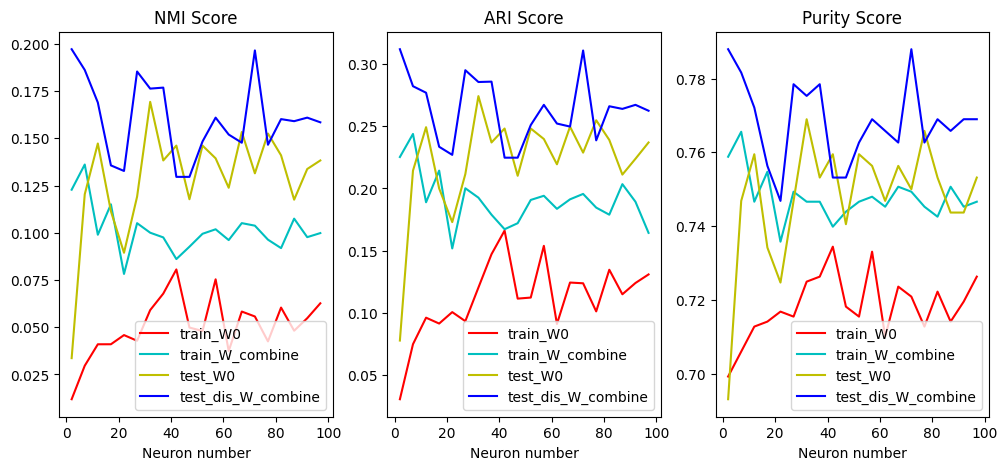

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0         train_W0  20.0  0.050609  0.015702  0.003511   0.043260  0.057958
1  train_W_combine  20.0  0.101583  0.012474  0.002789   0.095745  0.107421
2         combined  40.0  0.076096  0.029363  0.004643   0.066705  0.085486
                           Independent t-test  results
0  Difference (train_W0 - train_W_combine) =   -0.0510
1                       Degrees of freedom =   38.0000
2                                        t =  -11.3676
3                    Two side test p value =    0.0000
4                   Difference < 0 p value =    0.0000
5                   Difference > 0 p value =    1.0000
6                                Cohen's d =   -3.5947
7                                Hedge's g =   -3.5233
8                           Glass's delta1 =   -3.2463
9                         Point-Biserial r =   -0.8791
         Variable     N      Mean        SD        SE  95% Conf.  Interval
0    

In [4]:
#effect encoding  hybird
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,2,4)

neuron unit number: 2
train_discrete_score_W0_p 0.6897018970189702
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.6930379746835443
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.8577235772357723
train_discrete_score_W_discrete_n 0.35709253551124215
train_discrete_score_W_discrete_a 0.49931142485258484
test_discrete_score_W_discrete_p 0.8386075949367089
test_discrete_score_W_discrete_n 0.3062268225175252
test_discrete_score_W_discrete_a 0.4437607573361104
neuron unit number: 7
train_discrete_score_W0_p 0.6897018970189702
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.6930379746835443
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.94579945799458
train_discrete_score_W_discrete_n 0.6751573370316002
train_discrete_score_W_discrete_a 0.7912304498418788
test_discrete_score_W_discrete_p 0.9208860759493671
test_discrete_

train_discrete_score_W0_p 0.7046070460704607
train_discrete_score_W0_n 0.033975810555289136
train_discrete_score_W0_a  0.07692678904499768
test_discrete_score_W0_p 0.7436708860759493
test_discrete_score_W0_n 0.10569807633405161
test_discrete_score_W0_a 0.202351453678205
train_discrete_score_W_discrete_p 0.9728997289972899
train_discrete_score_W_discrete_n 0.8093492396363748
train_discrete_score_W_discrete_a 0.892506735560245
test_discrete_score_W_discrete_p 0.9715189873417721
test_discrete_score_W_discrete_n 0.8115321626679063
test_discrete_score_W_discrete_a 0.8870852862376886
neuron unit number: 77
train_discrete_score_W0_p 0.7032520325203252
train_discrete_score_W0_n 0.030027360333508692
train_discrete_score_W0_a  0.0643092637749106
test_discrete_score_W0_p 0.7658227848101266
test_discrete_score_W0_n 0.13783854666210732
test_discrete_score_W0_a 0.23085571179320805
train_discrete_score_W_discrete_p 1.0
train_discrete_score_W_discrete_n 1.0
train_discrete_score_W_discrete_a 1.0
test_d

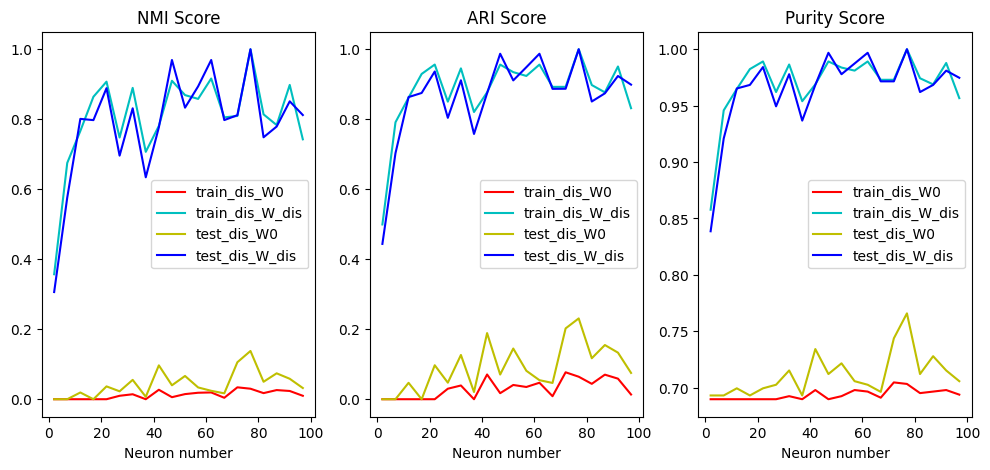

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0     train_dis_W0  20.0  0.012720  0.011396  0.002548   0.007386  0.018053
1  train_dis_W_dis  20.0  0.805028  0.132783  0.029691   0.742884  0.867173
2         combined  40.0  0.408874  0.411844  0.065118   0.277160  0.540588
                               Independent t-test  results
0  Difference (train_dis_W0 - train_dis_W_dis) =   -0.7923
1                           Degrees of freedom =   38.0000
2                                            t =  -26.5872
3                        Two side test p value =    0.0000
4                       Difference < 0 p value =    0.0000
5                       Difference > 0 p value =    1.0000
6                                    Cohen's d =   -8.4076
7                                    Hedge's g =   -8.2406
8                               Glass's delta1 =  -69.5240
9                             Point-Biserial r =   -0.9742
         Variable     N      Mean   

In [4]:
#new hash encoding
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,1,3)

neuron unit number: 2
train_discrete_score_W0_p 0.7032520325203252
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.6613924050632911
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.8929539295392954
train_discrete_score_W_discrete_n 0.4891604463614754
train_discrete_score_W_discrete_a 0.5946057254486488
test_discrete_score_W_discrete_p 0.8481012658227848
test_discrete_score_W_discrete_n 0.34584777293538366
test_discrete_score_W_discrete_a 0.47527924789419707
neuron unit number: 7
train_discrete_score_W0_p 0.7032520325203252
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.6613924050632911
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.9471544715447154
train_discrete_score_W_discrete_n 0.6679983927589199
train_discrete_score_W_discrete_a 0.7938908030723577
test_discrete_score_W_discrete_p 0.9462025316455697
test_discret

train_discrete_score_W_discrete_p 0.986449864498645
train_discrete_score_W_discrete_n 0.8984645523251729
train_discrete_score_W_discrete_a 0.944767095049407
test_discrete_score_W_discrete_p 0.9841772151898734
test_discrete_score_W_discrete_n 0.878519042827958
test_discrete_score_W_discrete_a 0.9367821440999843
neuron unit number: 77
train_discrete_score_W0_p 0.7168021680216802
train_discrete_score_W0_n 0.03470692905195058
train_discrete_score_W0_a  0.07811134998297058
test_discrete_score_W0_p 0.7088607594936709
test_discrete_score_W0_n 0.07993569374539053
test_discrete_score_W0_a 0.1527337949426405
train_discrete_score_W_discrete_p 0.991869918699187
train_discrete_score_W_discrete_n 0.9324211612651997
train_discrete_score_W_discrete_a 0.9667305308405281
test_discrete_score_W_discrete_p 0.9873417721518988
test_discrete_score_W_discrete_n 0.9080720705848483
test_discrete_score_W_discrete_a 0.9492403008071741
neuron unit number: 82
train_discrete_score_W0_p 0.7032520325203252
train_discre

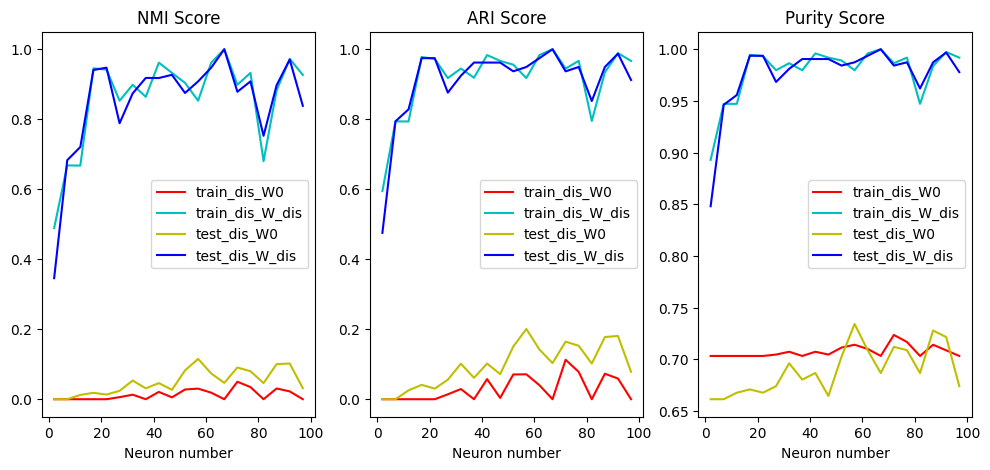

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0     train_dis_W0  20.0  0.012983  0.015358  0.003434   0.005795  0.020171
1  train_dis_W_dis  20.0  0.861641  0.132004  0.029517   0.799861  0.923420
2         combined  40.0  0.437312  0.439631  0.069512   0.296711  0.577913
                               Independent t-test  results
0  Difference (train_dis_W0 - train_dis_W_dis) =   -0.8487
1                           Degrees of freedom =   38.0000
2                                            t =  -28.5589
3                        Two side test p value =    0.0000
4                       Difference < 0 p value =    0.0000
5                       Difference > 0 p value =    1.0000
6                                    Cohen's d =   -9.0311
7                                    Hedge's g =   -8.8517
8                               Glass's delta1 =  -55.2580
9                             Point-Biserial r =   -0.9775
         Variable     N      Mean   

In [4]:
#new baseN
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,1,3)

neuron unit number: 2
train_discrete_score_W0_p 0.6761517615176151
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.7246835443037974
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.8387533875338753
train_discrete_score_W_discrete_n 0.31944142985540835
train_discrete_score_W_discrete_a 0.4501002767066935
test_discrete_score_W_discrete_p 0.879746835443038
test_discrete_score_W_discrete_n 0.4047314666424305
test_discrete_score_W_discrete_a 0.5589405956894457
neuron unit number: 7
train_discrete_score_W0_p 0.6761517615176151
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.7246835443037974
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.9701897018970189
train_discrete_score_W_discrete_n 0.7905152650347306
train_discrete_score_W_discrete_a 0.8822648864202781
test_discrete_score_W_discrete_p 0.9620253164556962
test_discrete_

train_discrete_score_W_discrete_p 0.9769647696476965
train_discrete_score_W_discrete_n 0.8514832397972776
train_discrete_score_W_discrete_a 0.9080790267860829
test_discrete_score_W_discrete_p 0.9746835443037974
test_discrete_score_W_discrete_n 0.8150435813003545
test_discrete_score_W_discrete_a 0.8961149619044024
neuron unit number: 77
train_discrete_score_W0_p 0.6897018970189702
train_discrete_score_W0_n 0.025974477127108476
train_discrete_score_W0_a  0.04872174437068825
test_discrete_score_W0_p 0.7436708860759493
test_discrete_score_W0_n 0.0688087470726226
test_discrete_score_W0_a 0.1599855745196067
train_discrete_score_W_discrete_p 0.9769647696476965
train_discrete_score_W_discrete_n 0.8387431934961252
train_discrete_score_W_discrete_a 0.9081772229119502
test_discrete_score_W_discrete_p 0.9715189873417721
test_discrete_score_W_discrete_n 0.786923531988512
test_discrete_score_W_discrete_a 0.8839507312299637
neuron unit number: 82
train_discrete_score_W0_p 0.6842818428184282
train_dis

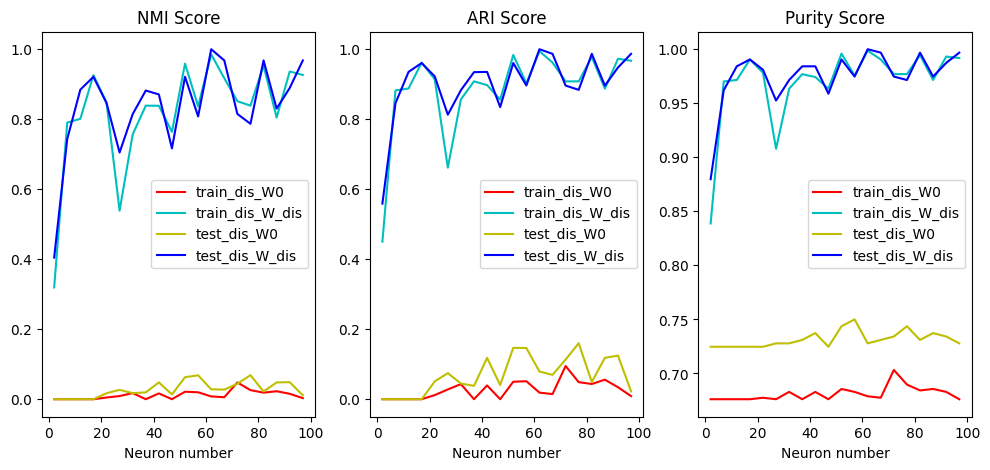

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0     train_dis_W0  20.0  0.011854  0.012402  0.002773   0.006050  0.017658
1  train_dis_W_dis  20.0  0.821532  0.154106  0.034459   0.749408  0.893656
2         combined  40.0  0.416693  0.423960  0.067034   0.281104  0.552282
                               Independent t-test  results
0  Difference (train_dis_W0 - train_dis_W_dis) =   -0.8097
1                           Degrees of freedom =   38.0000
2                                            t =  -23.4211
3                        Two side test p value =    0.0000
4                       Difference < 0 p value =    0.0000
5                       Difference > 0 p value =    1.0000
6                                    Cohen's d =   -7.4064
7                                    Hedge's g =   -7.2592
8                               Glass's delta1 =  -65.2882
9                             Point-Biserial r =   -0.9671
         Variable     N      Mean   

In [4]:
#new one hot encoding
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,1,3)

neuron unit number: 2
train_discrete_score_W0_p 0.6869918699186992
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.6993670886075949
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.8644986449864499
train_discrete_score_W_discrete_n 0.3876126367124
train_discrete_score_W_discrete_a 0.52341641943458
test_discrete_score_W_discrete_p 0.8575949367088608
test_discrete_score_W_discrete_n 0.3484635545984631
test_discrete_score_W_discrete_a 0.49371011433801143
neuron unit number: 7
train_discrete_score_W0_p 0.6869918699186992
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.6993670886075949
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.8915989159891599
train_discrete_score_W_discrete_n 0.4642604247464275
train_discrete_score_W_discrete_a 0.6057272920237019
test_discrete_score_W_discrete_p 0.9177215189873418
test_discrete_scor

train_discrete_score_W0_p 0.7086720867208672
train_discrete_score_W0_n 0.050478728273342606
train_discrete_score_W0_a  0.11644336629585032
test_discrete_score_W0_p 0.7310126582278481
test_discrete_score_W0_n 0.07644099239842843
test_discrete_score_W0_a 0.16292618367843456
train_discrete_score_W_discrete_p 0.940379403794038
train_discrete_score_W_discrete_n 0.6488319759247806
train_discrete_score_W_discrete_a 0.7716587702815428
test_discrete_score_W_discrete_p 0.9462025316455697
test_discrete_score_W_discrete_n 0.6648216682493262
test_discrete_score_W_discrete_a 0.7901011257078907
neuron unit number: 77
train_discrete_score_W0_p 0.6937669376693767
train_discrete_score_W0_n 0.0181463022782713
train_discrete_score_W0_a  0.042895762098727024
test_discrete_score_W0_p 0.7373417721518988
test_discrete_score_W0_n 0.08236324650033644
test_discrete_score_W0_a 0.16896586632708166
train_discrete_score_W_discrete_p 0.9634146341463414
train_discrete_score_W_discrete_n 0.7781945808142006
train_discre

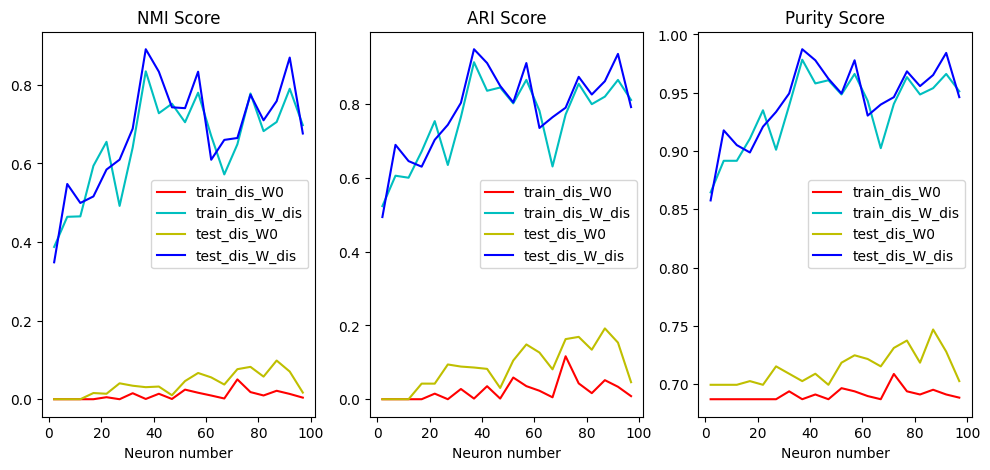

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0     train_dis_W0  20.0  0.010246  0.012446  0.002783   0.004421  0.016071
1  train_dis_W_dis  20.0  0.652178  0.122469  0.027385   0.594860  0.709495
2         combined  40.0  0.331212  0.336219  0.053161   0.223684  0.438740
                               Independent t-test  results
0  Difference (train_dis_W0 - train_dis_W_dis) =   -0.6419
1                           Degrees of freedom =   38.0000
2                                            t =  -23.3210
3                        Two side test p value =    0.0000
4                       Difference < 0 p value =    0.0000
5                       Difference > 0 p value =    1.0000
6                                    Cohen's d =   -7.3747
7                                    Hedge's g =   -7.2282
8                               Glass's delta1 =  -51.5764
9                             Point-Biserial r =   -0.9668
         Variable     N      Mean   

In [4]:
# new sum encoding
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,1,3)

neuron unit number: 2
train_discrete_score_W0_p 0.6815718157181572
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.7120253164556962
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.8983739837398373
train_discrete_score_W_discrete_n 0.5003567383527496
train_discrete_score_W_discrete_a 0.6224915389367592
test_discrete_score_W_discrete_p 0.939873417721519
test_discrete_score_W_discrete_n 0.6332234690498513
test_discrete_score_W_discrete_a 0.7641731165065646
neuron unit number: 7
train_discrete_score_W0_p 0.6815718157181572
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.7120253164556962
test_discrete_score_W0_n 0.0
test_discrete_score_W0_a 0.0
train_discrete_score_W_discrete_p 0.9390243902439024
train_discrete_score_W_discrete_n 0.6399451503773059
train_discrete_score_W_discrete_a 0.7661031853911061
test_discrete_score_W_discrete_p 0.9493670886075949
test_discrete_s

train_discrete_score_W0_p 0.7100271002710027
train_discrete_score_W0_n 0.05213284782444291
train_discrete_score_W0_a  0.1018845748437244
test_discrete_score_W0_p 0.7436708860759493
test_discrete_score_W0_n 0.07722290923482379
test_discrete_score_W0_a 0.16346938537099867
train_discrete_score_W_discrete_p 0.9607046070460704
train_discrete_score_W_discrete_n 0.7427576061031335
train_discrete_score_W_discrete_a 0.8464366531920023
test_discrete_score_W_discrete_p 0.9715189873417721
test_discrete_score_W_discrete_n 0.7899706777116633
test_discrete_score_W_discrete_a 0.8854812367231066
neuron unit number: 77
train_discrete_score_W0_p 0.7005420054200542
train_discrete_score_W0_n 0.04265391049649457
train_discrete_score_W0_a  0.10005899673127537
test_discrete_score_W0_p 0.75
test_discrete_score_W0_n 0.09394458150690531
test_discrete_score_W0_a 0.19287064851724223
train_discrete_score_W_discrete_p 0.9308943089430894
train_discrete_score_W_discrete_n 0.6070366731871129
train_discrete_score_W_disc

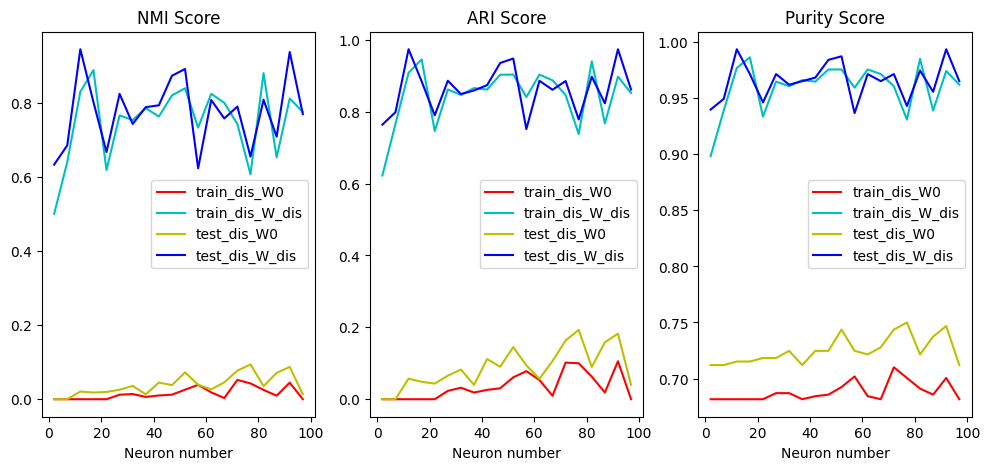

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0     train_dis_W0  20.0  0.015766  0.016936  0.003787   0.007839  0.023692
1  train_dis_W_dis  20.0  0.751569  0.100370  0.022443   0.704594  0.798544
2         combined  40.0  0.383667  0.379302  0.059973   0.262361  0.504974
                               Independent t-test  results
0  Difference (train_dis_W0 - train_dis_W_dis) =   -0.7358
1                           Degrees of freedom =   38.0000
2                                            t =  -32.3277
3                        Two side test p value =    0.0000
4                       Difference < 0 p value =    0.0000
5                       Difference > 0 p value =    1.0000
6                                    Cohen's d =  -10.2229
7                                    Hedge's g =  -10.0198
8                               Glass's delta1 =  -43.4449
9                             Point-Biserial r =   -0.9823
         Variable     N      Mean   

In [4]:
#new binary encoding
import experiment
unstable_repeat_num= 30
scope_num = 100
class_num = 2
dim_num = 7
best_num = 48
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,1,3)